In [1]:
#Step 0. User Input - Datset of Interest
hypothesis = 2

if hypothesis == 1:
    fileName = 'autoRAFeaturesDataT1vsT2_FullAlpha.csv'
elif hypothesis == 2:
    fileName = 'autoRAFeaturesDataT1vsT3_FullAlpha.csv'
else:
    print('Analysis not supported. Please use hypothesis = 1 or hypothesis = 2.')
    
#Step 1. Load Modules
#import os
import numpy as np
import matplotlib.pyplot as plt
from autora.skl.darts import DARTSRegressor, ValueType, DARTSExecutionMonitor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
import copy
from IPython.display import clear_output

# Step 2. Load Data, Split Into Predictors and Outcomes, and Normalize Predictors
#Load Data 
featuresData = np.genfromtxt(fileName, delimiter=',')
scaler = StandardScaler()
featuresData[:,1:] = scaler.fit_transform(featuresData[:,1:])

#Split data into predictors and outcomes
outcomes = featuresData[:,0]
predictors = featuresData[:,1:]

# Step 3. Iterate Through Data Using the Leave-One-Out Method


PRIMITIVES = [
    "none",
    "linear",
    "linear_logistic",
    "linear_relu",
    "linear_sin",
    "linear_tanh"
    ]

avgAccuracies =[]
x=1
for run in range(1000):
    #try:
    accuracies = []
    print((x/1000)*100)
    x+=1

    # General DARTS meta-parameters
    num_graph_nodes = 1
    max_epochs = 300
    sampling_strategy = 'max'

    # Meta-parameters for the architecture updates
    arch_updates_per_epoch = 1
    arch_learning_rate_max = 0.01
    arch_weight_decay = 3e-4
    arch_weight_decay_df = 0.01

    # Meta-parameters for the parameter updates
    param_updates_per_epoch = 100
    param_learning_rate_max = 0.025
    param_learning_rate_min = 0.01
    param_weight_decay = 3e-4
    param_momentum = 0.90
    param_updates_for_sampled_model = 1000

    # Meta-parameters for the classifier
    train_classifier_bias=True,
    train_classifier_coefficients=True

    # we will add this monitor to display the training performance
    execution_monitor_0 = DARTSExecutionMonitor()

    # run DARTS
    darts_estimator = DARTSRegressor(
        execution_monitor = execution_monitor_0.execution_monitor,
        num_graph_nodes = num_graph_nodes,
        max_epochs = max_epochs,
        arch_updates_per_epoch = arch_updates_per_epoch,
        arch_learning_rate_max = arch_learning_rate_max,
        arch_weight_decay = arch_weight_decay,
        arch_weight_decay_df = arch_weight_decay_df,
        param_updates_per_epoch = param_updates_per_epoch,
        param_learning_rate_max = param_learning_rate_max,
        param_learning_rate_min = param_learning_rate_min,
        param_weight_decay = param_weight_decay,
        param_momentum = param_momentum,
        train_classifier_bias = train_classifier_bias,
        train_classifier_coefficients = train_classifier_coefficients,
        output_type=ValueType.PROBABILITY,
        primitives=PRIMITIVES,
    )

    darts_estimator.fit(predictors, outcomes)

    #Saving architecture
    fixedArchitecture = copy.deepcopy(darts_estimator.network_)
    fullArchitecture = copy.deepcopy(darts_estimator)

    for participant in range(len(featuresData)):

        #To be explicit (although techinically unecessary), we will force the same, fixed architecture
        darts_estimator.network_ = fixedArchitecture

        #Determine final DARTS Architecture 
        darts_estimator.set_params(
            max_epochs = 0,
            arch_updates_per_epoch = 0,
            num_graph_nodes = 1,
            param_learning_rate_max = 0.025,
            arch_weight_decay_df = 0.01,
            arch_learning_rate_max = 0.01
        )

        #Split current data
        X_test = featuresData[participant,1:]
        X_test = X_test.reshape(1, -1)
        y_test = featuresData[participant,0]

        X_train = featuresData[:,1:]
        X_train = np.delete(X_train, participant, 0)
        y_train = featuresData[:,0]
        y_train = np.delete(y_train, participant)

        #Fit the new coefficients 
        darts_estimator.fit(X_train, y_train)

        #Evaluate the model
        y_predicted = darts_estimator.predict(X_test)
        accuracy = 1 - np.mean(np.abs(np.round(y_predicted.T)-y_test))
        accuracies.append(accuracy)
    clear_output(wait=True)
    print(round(np.mean(accuracies)*100,2))
    avgAccuracies.append(round(np.mean(accuracies)*100,2))

    with open('williamsBrainstormChallenge_SearchArchitecture.txt', 'a') as f:
        stringToWrite = str(round(np.mean(accuracies)*100,4)) + '\n'
        f.write(stringToWrite)

    if np.mean(accuracies)*100 >= 70:
        break

    #except:
    #    pass

72.86


Model:
k1 = logistic(0.37 * x1 + -0.69) + sin(1.88 * x2 + 1.72)
y1 = 1.45 * k1 + -0.9420783


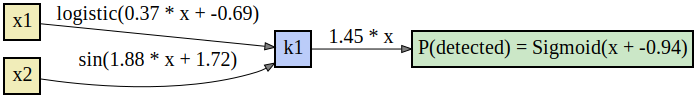

In [2]:
print(fullArchitecture.model_repr())
fullArchitecture.visualize_model()

In [3]:
sampledParticipants = [10, 20, 30]

for participant in sampledParticipants:
        #To be explicit (although techinically unecessary), we will force the same, fixed architecture
        darts_estimator.network_ = fixedArchitecture

        #Determine final DARTS Architecture 
        darts_estimator.set_params(
            max_epochs = 0,
            arch_updates_per_epoch = 0,
            num_graph_nodes = 1,
            param_learning_rate_max = .025,
            arch_weight_decay_df = .01,
            arch_learning_rate_max = .01
        )

        #Split current data
        X_test = featuresData[participant,1:]
        X_test = X_test.reshape(1, -1)
        y_test = featuresData[participant,0]

        X_train = featuresData[:,1:]
        X_train = np.delete(X_train, participant, 0)
        y_train = featuresData[:,0]
        y_train = np.delete(y_train, participant)

        #Fit the new coefficients 
        darts_estimator.fit(X_train, y_train)

        print(darts_estimator.model_repr())
        darts_estimator.visualize_model()

0it [00:00, ?it/s]

Model:
k1 = logistic(0.32 * x1 + -0.68) + sin(2.46 * x2 + 1.15)
y1 = 1.34 * k1 + -0.93771935


0it [00:00, ?it/s]

Model:
k1 = logistic(0.32 * x1 + -0.73) + sin(2.58 * x2 + 1.34)
y1 = 1.31 * k1 + -1.0930861


0it [00:00, ?it/s]

Model:
k1 = logistic(0.30 * x1 + -0.71) + sin(2.57 * x2 + 1.25)
y1 = 1.45 * k1 + -1.0103492
